<a href="https://colab.research.google.com/github/NigarSultana156/499A/blob/main/BirdIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Unzip the dataset (modify the path to match your dataset location)
import zipfile

dataset_path = '/content/drive/MyDrive/archive (1).zip'  # Adjust path
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/bangladeshi_birds')


In [10]:
# Step 3: Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/bangladeshi_birds/Native Birds of Bangladesh/Train'
test_dir = '/content/bangladeshi_birds/Native Birds of Bangladesh/Test'
val_dir = '/content/bangladeshi_birds/Native Birds of Bangladesh/Validate'


In [11]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1890 images belonging to 18 classes.
Found 274 images belonging to 18 classes.
Found 540 images belonging to 18 classes.


In [12]:
# Step 4: Build the Model (Transfer Learning with MobileNetV2)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# Step 5: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Adjust for your needs
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 499ms/step - accuracy: 0.1713 - loss: 2.9965 - val_accuracy: 0.8285 - val_loss: 0.9895
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 350ms/step - accuracy: 0.5713 - loss: 1.3523 - val_accuracy: 0.8504 - val_loss: 0.5829
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 326ms/step - accuracy: 0.7334 - loss: 0.8911 - val_accuracy: 0.8577 - val_loss: 0.5008
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.7591 - loss: 0.7487 - val_accuracy: 0.8686 - val_loss: 0.4309
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 333ms/step - accuracy: 0.7911 - loss: 0.6675 - val_accuracy: 0.9088 - val_loss: 0.3728
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 355ms/step - accuracy: 0.8162 - loss: 0.5779 - val_accuracy: 0.9088 - val_loss: 0.3393
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - accuracy: 0.8149 - loss: 0.6017 - val_accuracy: 0.9088 - val_loss: 0.3753
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 350ms/step - accuracy: 0.8197 - loss: 0.5696 - val_accuracy: 0.916

In [14]:
# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.9581 - loss: 0.1556
Test Accuracy: 96.67%


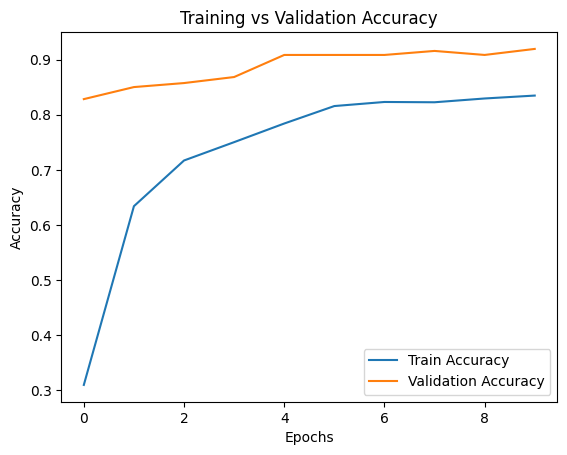

In [16]:
# Optional: Plot training results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


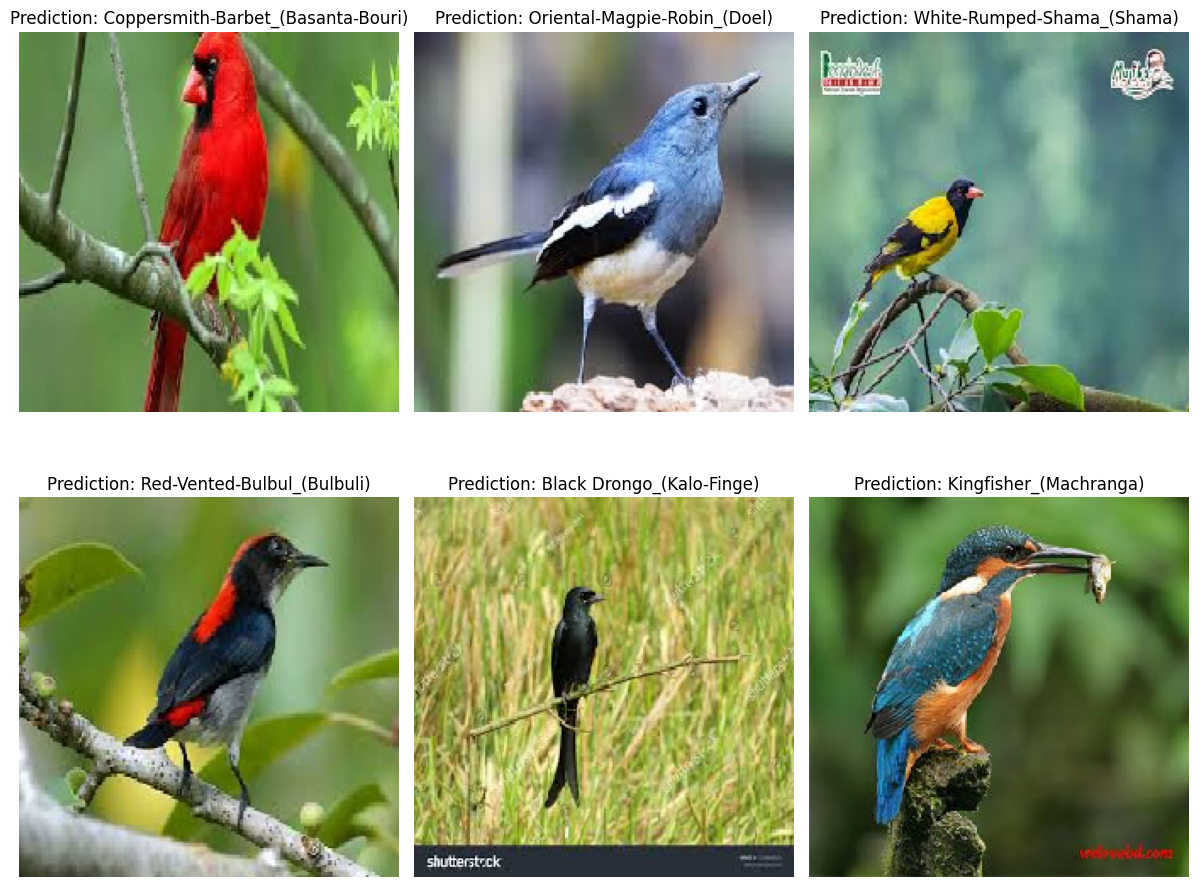

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# List of image paths to predict (update with your images)
img_paths = [
    '/content/test1.jpg',  # Replace with your image path
    '/content/test 2.jpg',  # Replace with your image path
    '/content/test3.jpg',  # Replace with your image path
    '/content/test4.jpg',  # Add more if needed
    '/content/test5.jpg',
    '/content/test6.jpg'
]

# Set the number of columns for the grid
num_columns = 3
num_rows = (len(img_paths) + num_columns - 1) // num_columns

# Initialize a figure with a specified size
plt.figure(figsize=(12, 5 * num_rows))

for i, img_path in enumerate(img_paths):
    # Load and preprocess each image
    img = image.load_img(img_path, target_size=(224, 224))  # Standardize size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]

    # Make predictions using the trained model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class name
    class_names = list(train_generator.class_indices.keys())
    predicted_class_name = class_names[predicted_class_index]

    # Display the image with its prediction in the grid
    plt.subplot(num_rows, num_columns, i + 1)

    # Convert the resized image array back to an image for consistent display
    img_resized = image.array_to_img(img_array[0])
    plt.imshow(img_resized)
    plt.title(f"Prediction: {predicted_class_name}")
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Saved artifact at '/tmp/tmpc_32kv70'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 18), dtype=tf.float32, name=None)
Captures:
  137535818661056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535572655648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535572653712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137537872857216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535817467856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535572650544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535573151584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535573156336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535573148592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535573152992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535573

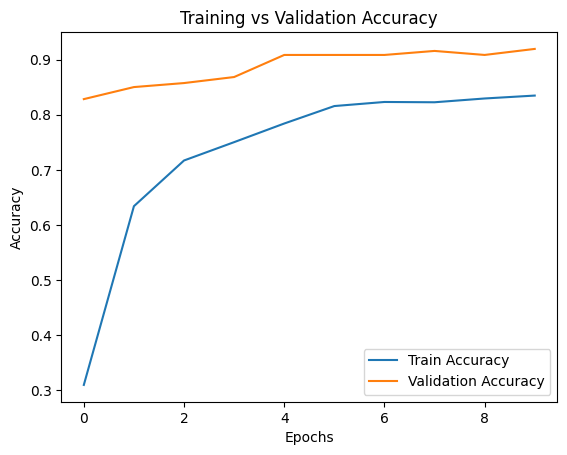

In [15]:
# Step 7: Convert Model to TensorFlow Lite (for mobile)
import tensorflow as tf
# Convert the trained model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('bangladeshi_birds_model.tflite', 'wb') as f:
    f.write(tflite_model)